# M2608.001300 Machine Learning <br> Assignment #6-2 Apply HMM to bitcoin

Copyright (C) Data Science Laboratory, Seoul National University. This material is for educational uses only. Some contents are based on the material provided by other paper/book authors and may be copyrighted by them. Written by Hyemi Jang, May 2018

**Note**: certain details are missing or ambiguous on purpose, in order to test your knowledge on the related materials. However, if you really feel that something essential is missing and cannot proceed to the next step, then contact the teaching staff with clear description of your problem.

### Submitting your work:
<font color=red>**DO NOT clear the final outputs**</font> so that TAs can grade both your code and results.  
Once you have done **all parts**, run the *CollectSubmission.sh* script with your **student_id** as input argument. <br>
This will produce a zipped file called *[student_id].zip*. Please submit this file on ETL. &nbsp;&nbsp; (Usage: ./*CollectSubmission.sh* &nbsp; student_id)

## Bitcoin data
- https://www.kaggle.com/mczielinski/bitcoin-historical-data

In [1]:
import numpy as np 
import pandas as pd

from subprocess import check_output
print(check_output(["ls", "./data"]).decode("utf8"))

bitflyerJPY_1-min_data_2017-07-04_to_2018-01-08.csv
bitstampUSD_1-min_data_2012-01-01_to_2018-01-08.csv
coinbaseUSD_1-min_data_2014-12-01_to_2018-01-08.csv
coincheckJPY_1-min_data_2014-10-31_to_2018-01-08.csv
sample.csv



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
bitJPY = pd.read_csv('./data/bitflyerJPY_1-min_data_2017-07-04_to_2018-01-08.csv')
bitJPY['Timestamp'] = bitJPY['Timestamp'].values.astype(int)

import datetime
bitJPY['Timestamp'] = [
    datetime.datetime.fromtimestamp(
    x
).strftime('%Y-%m-%d %H:%M:%S')
    for x in bitJPY['Timestamp'].values
]
bitJPY.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,State
0,2017-07-04 04:01:00,296127,296558,296016,296540,1.158600,3.432441e+05,296257.6717,True
1,2017-07-04 04:02:00,296539,296769,296060,296679,11.115510,3.295332e+06,296462.5137,False
2,2017-07-04 04:03:00,296060,296090,296060,296060,5.527494,1.636491e+06,296063.8362,True
3,2017-07-04 04:04:00,296060,296260,296015,296015,8.414064,2.491620e+06,296125.6678,True
4,2017-07-04 04:05:00,296361,296540,296155,296155,3.993010,1.183292e+06,296340.7857,False


Populating the interactive namespace from numpy and matplotlib


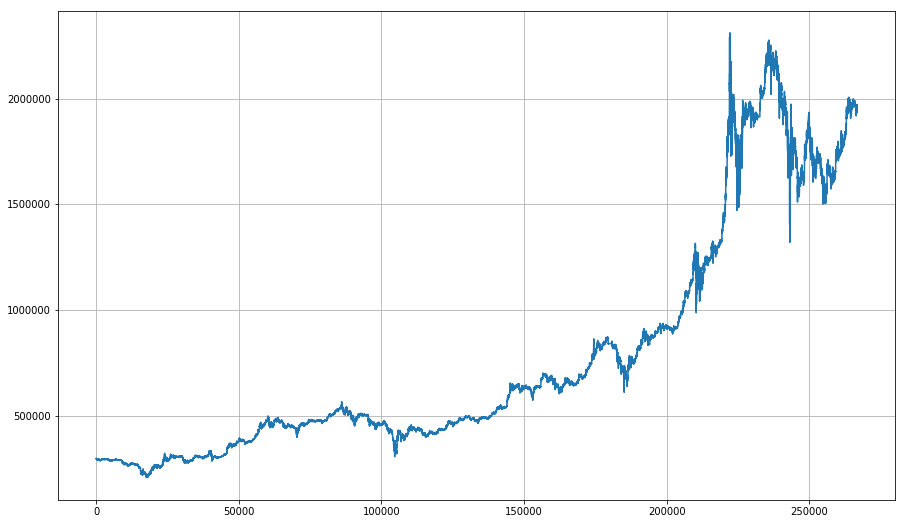

In [3]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)  
bitJPY["Weighted_Price"].plot(grid = True)

## Make your model that predict future bitcoin price

In [4]:
data = bitJPY['Weighted_Price'].values
label = bitJPY['State'].values.astype(int)
print(data.shape, label.shape)

(266775,) (266775,)


In [5]:
def test(model, X, Z):
    Z_hat = model.decode(X, lengths=(seq_len,))[1] ## you can change this line following your model
    
    plt.subplot(211)
    plt.plot(X, lw=5)
    X[Z_hat == 0] = np.nan
    plt.plot(X, 'r-', lw=5)
    plt.title("X cumulated")
    plt.subplot(212)
    plt.plot(Z, 'bo-')
    plt.plot(Z_hat, 'ro-')
    plt.title("discrete state")
    plt.tight_layout()
    plt.show()
    
    print('Accuracy : ' ,(Z_hat == Z).sum() / Z.shape[0] * 100 )  

In [ ]:
"""
Implement your model here.
You can import any library and use it.
Also, you can implement from scratch.
We only check the accuracy of your model. 
"""

from hmmlearn.hmm import GaussianHMM

model = 

## Explain your model
Explain the details of your model. 

In [ ]:
test(model, X[:100], Z[:100])